# Points of Interest

In [3]:
import geopy.distance
import numpy as np
import pandas as pd

In [4]:
metro_art_coords = (40.7794, -73.9632)
empire_state_coords = (40.7484, -73.9857)

metro_empire_distance = geopy.distance.distance(metro_art_coords, empire_state_coords)
print(metro_empire_distance)
print(metro_empire_distance.mi)

3.9319431838509655 km
2.443196223958933


In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import modules.data as data
uber_data = data.getJul14Data()

In [20]:
print(uber_data[['Lat','Lon']].apply(lambda x: tuple(x), axis=1))

0         (40.7586, -73.9706)
1         (40.7605, -73.9994)
2          (40.732, -73.9999)
3         (40.7635, -73.9793)
4         (40.7204, -74.0047)
                 ...         
796116    (40.7285, -73.9846)
796117    (40.7615, -73.9868)
796118     (40.677, -73.9515)
796119    (40.7225, -74.0038)
796120    (40.7199, -73.9884)
Length: 796121, dtype: object


In [23]:
# Geopy might be quite inefficient in calculating the distance, we can write our own haverstine function
from math import radians, cos, sin, asin, sqrt

def haversine(coordinates1, coordinates2):
    """Takes two coordinates and uses the Haversine equation to calculate the distance"""
    lon1 = coordinates1[1]
    lat1 = coordinates1[0]
    lon2 = coordinates2[1]
    lat2 = coordinates2[0]
    
    # Change to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # Apply the Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3956
    return c * r

In [25]:
print(metro_empire_distance.mi)
print(haversine(metro_art_coords, empire_state_coords))

2.443196223958933
2.442501323483997


In [27]:
# Using the Haversine formula we can look at how far the coordinates in the data are from both attractions
uber_data['Distance Met'] = uber_data[['Lat', 'Lon']].apply(lambda x: haversine(metro_art_coords, tuple(x)), axis=1)
uber_data['Distance Empire State'] = uber_data[['Lat', 'Lon']].apply(lambda x: haversine(empire_state_coords, tuple(x)), axis=1)


uber_data.head(5)


,Date/Time,Lat,Lon,Base,Distance Met,Distance Empire State
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1.487358,1.058178
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2.299140,1.100642
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,3.794105,1.354266
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1.383450,1.094999
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,4.615925,2.173858


In [28]:
# Summarise the data
uber_data[['Distance Met', 'Distance Empire State']].describe()

,Distance Met,Distance Empire State
count,796121.000000,796121.000000
mean,3.868244,2.723783
std,3.200848,3.276343
min,0.037592,0.000000
25%,1.863763,0.976621
50%,3.329218,1.726115
75%,4.691434,3.037256
max,86.770131,88.188585


In [29]:
# How many of these rides were with a certain distance of these points of interest
(uber_data[['Distance Met', 'Distance Empire State']] < 0.25).sum()

Distance Met              2764
Distance Empire State    15133
dtype: int64

In [32]:
import numpy as np
distance_range = np.arange(.1,5.1,.1)
distance_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [35]:
distance_data = [(uber_data[['Distance Met', 'Distance Empire State']] < dist).sum() for dist in distance_range]
distance_data

[Distance Met              575
 Distance Empire State    2387
 dtype: int64,
 Distance Met             1776
 Distance Empire State    9661
 dtype: int64,
 Distance Met              4566
 Distance Empire State    22166
 dtype: int64,
 Distance Met              8783
 Distance Empire State    42427
 dtype: int64,
 Distance Met             13606
 Distance Empire State    68011
 dtype: int64,
 Distance Met             20770
 Distance Empire State    92650
 dtype: int64,
 Distance Met              29408
 Distance Empire State    119621
 dtype: int64,
 Distance Met              38912
 Distance Empire State    147815
 dtype: int64,
 Distance Met              50497
 Distance Empire State    177759
 dtype: int64,
 Distance Met              63072
 Distance Empire State    206056
 dtype: int64,
 Distance Met              75474
 Distance Empire State    240003
 dtype: int64,
 Distance Met              89442
 Distance Empire State    277785
 dtype: int64,
 Distance Met             105692
 Distance E

In [36]:
distance_data = pd.concat(distance_data, axis=1)
distance_data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Distance Met,575,1776,4566,8783,13606,20770,29408,38912,50497,63072,...,512662,529702,546998,563198,575552,588588,597941,614256,621624,626604
Distance Empire State,2387,9661,22166,42427,68011,92650,119621,147815,177759,206056,...,656735,661066,665748,670373,674744,678522,682262,685487,688588,691884


In [39]:
# Transpose and add in the index
distance_data = distance_data.transpose()
distance_data.index = distance_range
distance_data

,Distance Met,Distance Empire State
0.1,575,2387
0.2,1776,9661
0.3,4566,22166
0.4,8783,42427
0.5,13606,68011
0.6,20770,92650
0.7,29408,119621
0.8,38912,147815
0.9,50497,177759
1.0,63072,206056


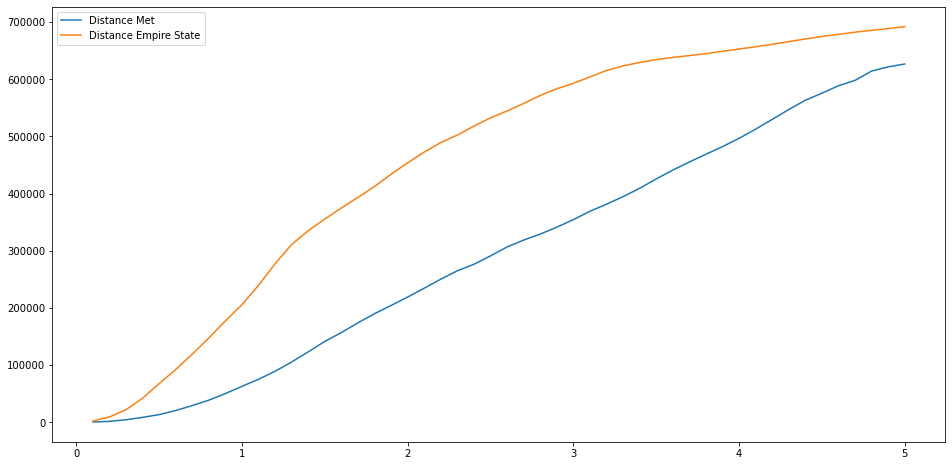

In [41]:
distance_data.plot(kind='line', figsize=(16,8))